# Second Project: Classification

Team members:
- Harry Bhasin
- Oscar Padilla
- Najeeb Zaidi


In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,pandas,matplotlib,sklearn

last updated: 2017-07-15 

CPython 2.7.12
IPython 5.1.0

numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.3
sklearn 0.18.1


- [Load Data & Libraries](#1.-Load-Data-&-Libraries)

- [Data Preparation](#2.-Data-Preparation)
    - [Conversion of Categorical Attributes](#2.1-Conversion-of-Categorical-Attributes)
    - [Histogram](#2.2-Histogram-of-Numerical-Features)
    - [One-Hot-Encoding](#2.3-One-Hot-Encoding)
    - [Dimensionality Reduction](#2.4-Dimensionality-Reduction)
    - [PCA](#2.5-PCA)

- [Task A: Classification](#3.-Classification)
    - [Logistic Regression](#3.1-Logistic-Regression)
    - [KNN](#3.2-KNN)
    - [Naive Bayes](#3.3-Naive-Bayes)

    
- [Task B: Regression](#4.-Regression)
    - [Linear Regression](#4.1-Linear-Regression)
    - [Kernel Regression](#4.2-Kernel-Regression)
    - [Regression Tree](#4.3-Regression-Tree)
    
- [Deployment](#5.-Deployment)

# Bank Marketing

Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")
   
   The zip file includes two datasets: 
      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

5. Number of Instances: 41188 for bank-additional-full.csv

6. Number of Attributes: 20 + output attribute.

7. Attribute information (see below)

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

   For more information, read [Moro et al., 2014].

   Input variables:
#### bank client data:

   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
#### related with the last contact of the current campaign:

   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   
#### other attributes:

   12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   
#### social and economic context attributes:

  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)    
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)    
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)

###  Output variable (desired target):

  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

### IMPORTANT NOTE:

*Because the duration attribute highly affects the output target (e.g., if duration=0 then y="no") and more importantly cannot be known before a call is performed, therefore it should be excluded from the classification model (Task A).*

*On the other hand, for purposes of Task B, regression model 'y' will be excluded and we will try to predict duration.*

[Back to Top](#Second-Project:-Classification)

## 1. Load Data & Libraries 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from __future__ import print_function
import csv

path = '/Users/GS7271/Documents/MSDS7331/Project2/bank-additional/bank-additional-full.csv'

df_train = pd.read_csv(path, sep = ';')

df_train.shape
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
df_train.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
df_train_group = df_train.groupby('y')
df_train_group.describe()

age      campaign  cons.conf.idx  cons.price.idx  \
y                                                                      
no  count  36548.000000  36548.000000   36548.000000    36548.000000   
    mean      39.911185      2.633085     -40.593097       93.603757   
    std        9.898132      2.873438       4.391155        0.558993   
    min       17.000000      1.000000     -50.800000       92.201000   
    25%       32.000000      1.000000     -42.700000       93.075000   
    50%       38.000000      2.000000     -41.800000       93.918000   
    75%       47.000000      3.000000     -36.400000       93.994000   
    max       95.000000     56.000000     -26.900000       94.767000   
yes count   4640.000000   4640.000000    4640.000000     4640.000000   
    mean      40.913147      2.051724     -39.789784       93.354386   
    std       13.837476      1.666245       6.139668        0.676644   
    min       17.000000      1.000000     -50.800000       92.201000   
    25%       31.000000      1.000000     -46.200000       92.893000   
    50%       37.000000      2.000000     -40.400000       93.200000   
    75%       50.000000      2.000000     -36.100000       93.918000   
    max       98.000000     23.000000     -26.900000       94.767000   

               duration  emp.var.rate     euribor3m   nr.employed  \
y                                                                   
no  count  36548.000000  36548.000000  36548.000000  36548.000000   
    mean     220.844807      0.248875      3.811491   5176.166600   
    std      207.096293      1.482932      1.638187     64.571979   
    min        0.000000     -3.400000      0.634000   4963.600000   
    25%       95.000000     -1.800000      1.405000   5099.100000   
    50%      163.500000      1.100000      4.857000   5195.800000   
    75%      279.000000      1.400000      4.962000   5228.100000   
    max     4918.000000      1.400000      5.045000   5228.100000   
yes count   4640.000000   4640.000000   4640.000000   4640.000000   
    mean     553.191164     -1.233448      2.123135   5095.115991   
    std      401.171871      1.623626      1.742598     87.572641   
    min       37.000000     -3.400000      0.634000   4963.600000   
    25%      253.000000     -1.800000      0.849000   5017.500000   
    50%      449.000000     -1.800000      1.266000   5099.100000   
    75%      741.250000     -0.100000      4.406000   5191.000000   
    max     4199.000000      1.400000      5.045000   5228.100000   

                  pdays      previous  
y                                      
no  count  36548.000000  36548.000000  
    mean     984.113878      0.132374  
    std      120.656868      0.409199  
    min        0.000000      0.000000  
    25%      999.000000      0.000000  
    50%      999.000000      0.000000  
    75%      999.000000      0.000000  
    max      999.000000      7.000000  
yes count   4640.000000   4640.000000  
    mean     792.035560      0.492672  
    std      403.407181      0.860344  
    min        0.000000      0.000000  
    25%      999.000000      0.000000  
    50%      999.000000      0.000000  
    75%      999.000000      1.000000  
    max      999.000000      6.000000

It is not a balanced dataset: ~89% of the responses are NO!

no     36548
yes     4640
Name: y, dtype: int64


([<matplotlib.patches.Wedge at 0x1158c38d0>,
  <matplotlib.text.Text at 0x1157fc090>])

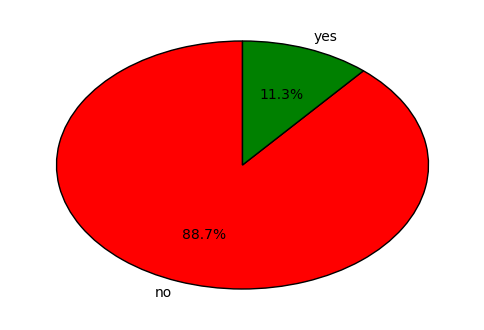

In [6]:
import matplotlib.pyplot as plt

y_count = df_train['y'].value_counts()

print(y_count)
plt.pie(y_count, labels = ['no', 'yes'], colors = ['red', 'green'], startangle = 90, autopct = '%1.1f%%')

#### Important note: 
This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

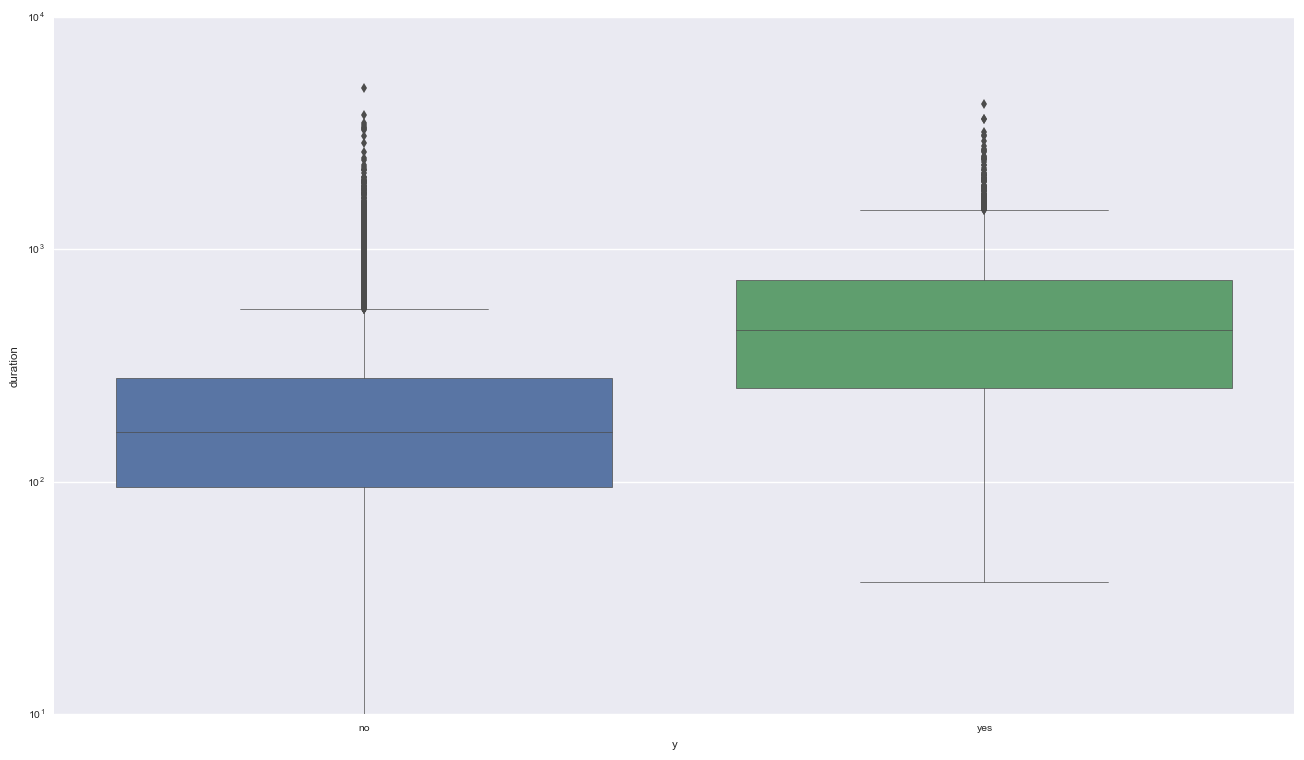

In [7]:
import seaborn as sns

plt.figure(figsize = (16, 9))
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale = 0.75, rc={"lines.linewidth": 0.5})
ax = sns.boxplot(x = "y", y = "duration", data = df_train)
sns.despine(left = True)
ax.set_yscale('log')

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

#### Important note:

999 means client was not previously contacted

This artificial alteration heavily skews the data

(array([  1515.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  39673.]),
 array([   0. ,   99.9,  199.8,  299.7,  399.6,  499.5,  599.4,  699.3,
         799.2,  899.1,  999. ]),
 <a list of 10 Patch objects>)

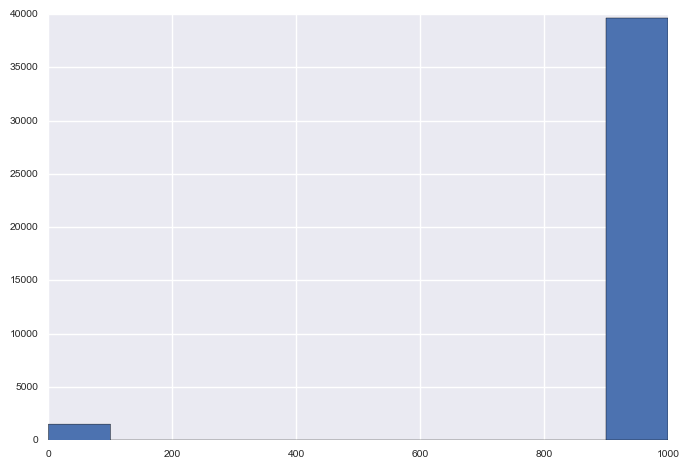

In [8]:
plt.hist(df_train.pdays)

#### Variables with extremely high > |0.8| correlation

    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

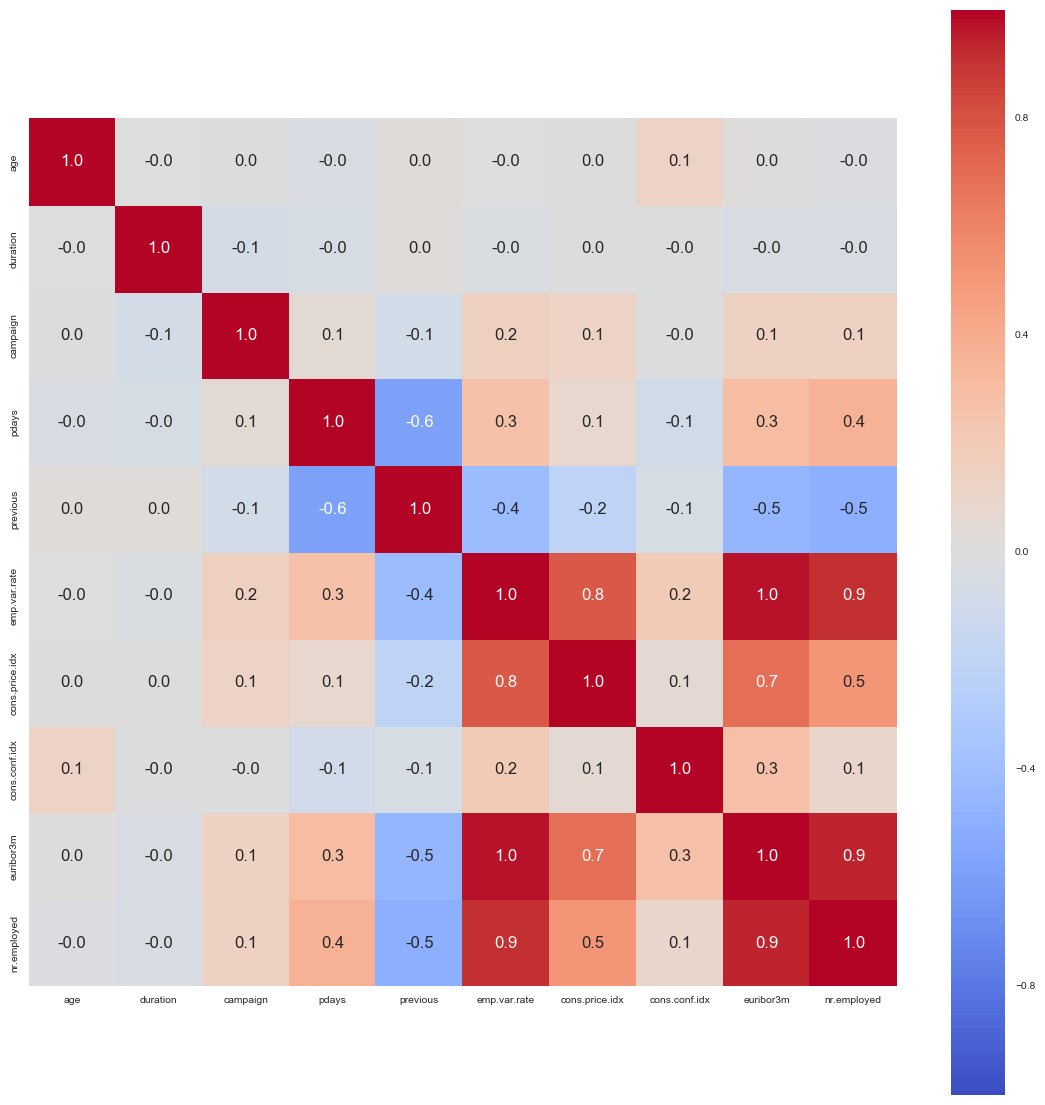

In [9]:
corr = df_train.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 12}, cmap= 'coolwarm')

[Back to Top](#Second-Project:-Classification)

## 2. Data Preparation

### 2.1 Conversion of Categorical Attributes

In [18]:
print('\n', 'job', '\n', df_train['job'].value_counts())
print('\n', 'marital', '\n', df_train['marital'].value_counts())
print('\n', 'education', '\n', df_train['education'].value_counts())


print('\n', 'default', '\n', df_train['default'].value_counts())
print('\n', 'housing', '\n', df_train['housing'].value_counts())
print('\n', 'loan', '\n', df_train['loan'].value_counts())

print('\n', 'contact', '\n', df_train['contact'].value_counts())
print('\n', 'month', '\n', df_train['month'].value_counts())
print('\n', 'day_of_week', '\n', df_train['day_of_week'].value_counts())

print('\n', 'poutcome', '\n', df_train['poutcome'].value_counts())

print('\n', 'y', '\n', df_train['y'].value_counts())


 job 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

 marital 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

 education 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

 default 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64

 housing 
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

 loan 
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

 contact 
 1    26144
0    15044
Nam

In [11]:
df_train['y'].replace({'yes': 1, 'no': 0}, inplace = True)
    
print('\n', 'y', '\n', df_train['y'].value_counts())


 y 
 0    36548
1     4640
Name: y, dtype: int64


The contact attribute has two possible outcomes: cellular (1) or fixed line (0)

In [12]:
di_cellular = {'cellular': 1, 'telephone': 0}

df_train['contact'].replace(di_cellular, inplace = True)
    
print('\n', 'contact', '\n', df_train['contact'].value_counts())


 contact 
 1    26144
0    15044
Name: contact, dtype: int64


### 2.2 Histogram of Numerical Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b5522d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1161dfb50>]], dtype=object)

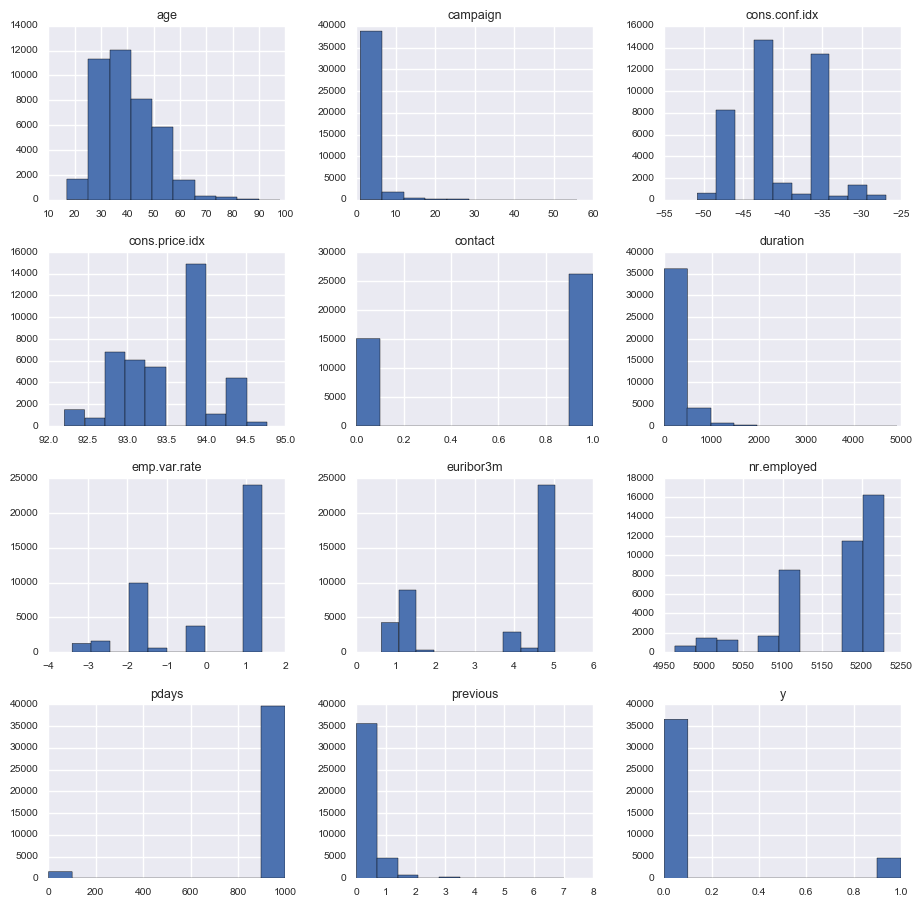

In [19]:
df_train[df_train.dtypes[(df_train.dtypes == "float64")|(df_train.dtypes == "int64")]
                        .index.values].hist(figsize=[11,11])

### 2.3 One-Hot-Encoding

In [14]:
nominal_features = ['job', 'marital', 'education', 'month', 'day_of_week', 'default', 'housing', 'loan', 'poutcome']

one_hot_df = pd.concat([pd.get_dummies(df_train[col], prefix = col) for col in nominal_features], axis = 1)

one_hot_df.tail()

df = pd.concat([df_train, one_hot_df], axis = 1)

In [21]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
41183,73,retired,married,professional.course,no,yes,no,1,nov,fri,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
41184,46,blue-collar,married,professional.course,no,no,no,1,nov,fri,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
41185,56,retired,married,university.degree,no,yes,no,1,nov,fri,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
41186,44,technician,married,professional.course,no,no,no,1,nov,fri,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
41187,74,retired,married,professional.course,no,yes,no,1,nov,fri,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 72 columns):
age                              41188 non-null int64
job                              41188 non-null object
marital                          41188 non-null object
education                        41188 non-null object
default                          41188 non-null object
housing                          41188 non-null object
loan                             41188 non-null object
contact                          41188 non-null int64
month                            41188 non-null object
day_of_week                      41188 non-null object
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
poutcome                         41188 non-null object
emp.var.rate                     41188 non-null float64
cons.price.idx  

### 2.4 Dimensionality Reduction

Converted categorical features need to be removed

In [23]:
df_reduced = df.drop(df[nominal_features], axis = 1)

df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null int64
contact                          41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null int64
job_admin.                       41188 non-null float64
job_blue-collar                  41188 non-null float64
job_entrepreneur                 41188 non-null float64
job_housemaid                    41188 non-null float64
job_manag

Unknowns features generated by one-hot-encoding need to be eliminated

In [24]:
unknowns = ['default_unknown', 'housing_unknown', 'loan_unknown', 'poutcome_nonexistent']
    
df_reduced = df_reduced.drop(df_reduced[unknowns], axis = 1)

df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 59 columns):
age                              41188 non-null int64
contact                          41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null int64
job_admin.                       41188 non-null float64
job_blue-collar                  41188 non-null float64
job_entrepreneur                 41188 non-null float64
job_housemaid                    41188 non-null float64
job_manag

High correlation variables are also removed

In [25]:
high_correlation = ['emp.var.rate', 'cons.price.idx', 'euribor3m']
    
df_reduced = df_reduced.drop(df_reduced[high_correlation], axis = 1)

df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 56 columns):
age                              41188 non-null int64
contact                          41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
cons.conf.idx                    41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null int64
job_admin.                       41188 non-null float64
job_blue-collar                  41188 non-null float64
job_entrepreneur                 41188 non-null float64
job_housemaid                    41188 non-null float64
job_management                   41188 non-null float64
job_retired                      41188 non-null float64
job_self-employed                41188 non-null float64
job_servi

As explained above the duration attribute must be removed from the classification predictive model

In [26]:
df_classification = df_reduced.drop(df_reduced[['duration']], axis = 1)

df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 55 columns):
age                              41188 non-null int64
contact                          41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
cons.conf.idx                    41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null int64
job_admin.                       41188 non-null float64
job_blue-collar                  41188 non-null float64
job_entrepreneur                 41188 non-null float64
job_housemaid                    41188 non-null float64
job_management                   41188 non-null float64
job_retired                      41188 non-null float64
job_self-employed                41188 non-null float64
job_services                     41188 non-null float64
job_stu

In [27]:
df_classification.tail()

,age,contact,campaign,pdays,previous,cons.conf.idx,nr.employed,y,job_admin.,job_blue-collar,...,day_of_week_tue,day_of_week_wed,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success
41183,73,1,1,999,0,-50.8,4963.6,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
41184,46,1,1,999,0,-50.8,4963.6,0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
41185,56,1,2,999,0,-50.8,4963.6,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
41186,44,1,1,999,0,-50.8,4963.6,1,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
41187,74,1,3,999,1,-50.8,4963.6,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


### 2.5 PCA 

In [28]:
y = df_classification['y'].values
X = df_classification.ix[:, df_classification.columns != 'y'].values

PCA before Scaling/Standardization: 2 components explain 99% of the variance

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
x_pca = pca.fit_transform(X)
print (x_pca.shape)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(41188, 2)
[ 0.88749294  0.10898641]
0.996479354747


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

PCA after Scaling/Standardization: 40 components explain 96% of the variance

In [33]:
pca = PCA(n_components = 0.95)
x_pca = pca.fit_transform(X_scaled)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(41188, 40)
[ 0.06232541  0.04818516  0.04251491  0.03839661  0.03515951  0.03369944
  0.03253518  0.03085881  0.03052217  0.02740235  0.02683441  0.02461454
  0.02341346  0.02335652  0.02302482  0.0229125   0.02206128  0.02177987
  0.02128704  0.02109078  0.02017146  0.01970405  0.01966045  0.01932026
  0.01924734  0.01904758  0.01878009  0.01859009  0.01854267  0.01835885
  0.01832913  0.01797178  0.01785617  0.01655996  0.01628026  0.01557734
  0.01492469  0.01470079  0.01306871  0.01119577]
0.959862246357


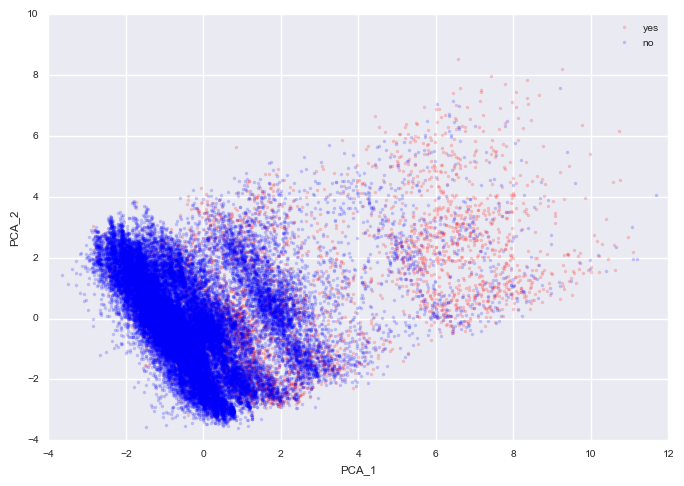

In [34]:
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = x_pca[:,0]
PCA_df['PCA_2'] = x_pca[:,1]


plt.plot(PCA_df['PCA_1'][df_classification.y == 1], PCA_df['PCA_2'][df_classification.y == 1],'o', alpha = 0.2, color = 'r', markersize = 2.5)
plt.plot(PCA_df['PCA_1'][df_classification.y == 0], PCA_df['PCA_2'][df_classification.y == 0],'o', alpha = 0.2, color = 'b', markersize = 2.5)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['yes','no'])

**Description of the new data set**

[Back to Top](#Second-Project:-Classification)

## 3. Classification 

### 3.1 Logistic Regression

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [92]:
from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

print(class_weight)

[ 0.56317085  4.45752165]


In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components = 40)),
                    ('clf', LogisticRegression(random_state = 1, class_weight = class_weight))])

%time pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

CPU times: user 2.28 s, sys: 73.3 ms, total: 2.35 s
Wall time: 761 ms
Test Accuracy: 0.796


In [98]:
from sklearn.model_selection import StratifiedKFold
    
%time kfold = StratifiedKFold(n_splits = 10, random_state = 1).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k + 1, np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CPU times: user 52 µs, sys: 4 µs, total: 56 µs
Wall time: 57 µs
Fold: 1, Class dist.: [26328  3326], Acc: 0.789
Fold: 2, Class dist.: [26328  3326], Acc: 0.787
Fold: 3, Class dist.: [26328  3326], Acc: 0.783
Fold: 4, Class dist.: [26328  3326], Acc: 0.788
Fold: 5, Class dist.: [26329  3326], Acc: 0.798
Fold: 6, Class dist.: [26329  3326], Acc: 0.784
Fold: 7, Class dist.: [26329  3327], Acc: 0.788
Fold: 8, Class dist.: [26329  3327], Acc: 0.778
Fold: 9, Class dist.: [26329  3327], Acc: 0.795
Fold: 10, Class dist.: [26329  3327], Acc: 0.798

CV accuracy: 0.789 +/- 0.006


In [99]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = pipe_lr, X = X_train, y = y_train, cv = 10, n_jobs = 1)
print('CV accuracy scores: %s' % np.round(scores, 3))
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.789  0.787  0.783  0.788  0.798  0.784  0.788  0.778  0.795  0.798]
CV accuracy: 0.789 +/- 0.006


In [108]:
from sklearn.metrics import confusion_matrix

wclf = LogisticRegression(random_state = 1, class_weight = class_weight)
%time wclf.fit(X_train, y_train)
y_hat = wclf.predict(X_test)
c_m = confusion_matrix(y_test, y_hat)

print('Logistic Regression with weight:\n confusion matrix\n', c_m,'\n\n')
print('\n Classification report \n', classification_report(y_test, y_hat))

CPU times: user 737 ms, sys: 6.74 ms, total: 743 ms
Wall time: 745 ms
Logistic Regression with weight:
 confusion matrix
 [[5661 1633]
 [ 292  652]] 



 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.78      0.85      7294
          1       0.29      0.69      0.40       944

avg / total       0.87      0.77      0.80      8238



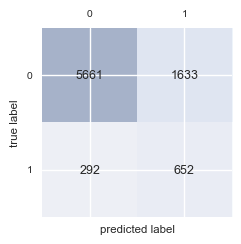

In [110]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(c_m, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(c_m.shape[0]):
    for j in range(c_m.shape[1]):
        ax.text(x = j, y = i, s = c_m[i, j], va = 'center', ha = 'center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

In [109]:
cost_matrix = np.array([[0, -10],[-100, 100]])
total_gain = np.sum(cost_matrix * c_m)
print(cost_matrix * c_m)
print(total_gain)

[[     0 -16330]
 [-29200  65200]]
19670


### 3.2 KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt

yhat = np.zeros(y.shape)

k_range = list(range(1, 12))
k_accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    %time score = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    k_accuracy.append(score.mean())
print(np.round(k_accuracy, 3))

CPU times: user 19.3 s, sys: 102 ms, total: 19.4 s
Wall time: 19.6 s
CPU times: user 18.8 s, sys: 60.6 ms, total: 18.8 s
Wall time: 18.9 s
CPU times: user 20.6 s, sys: 155 ms, total: 20.8 s
Wall time: 21 s
CPU times: user 20 s, sys: 88.1 ms, total: 20.1 s
Wall time: 20.2 s
CPU times: user 21.6 s, sys: 119 ms, total: 21.8 s
Wall time: 22 s
CPU times: user 21.1 s, sys: 95.9 ms, total: 21.2 s
Wall time: 21.4 s
CPU times: user 20.6 s, sys: 58.1 ms, total: 20.6 s
Wall time: 20.7 s
CPU times: user 21.5 s, sys: 92.6 ms, total: 21.6 s
Wall time: 21.8 s
CPU times: user 20.5 s, sys: 51.3 ms, total: 20.5 s
Wall time: 20.6 s
[ 0.849  0.891  0.883  0.892  0.889  0.893  0.892  0.895  0.893]


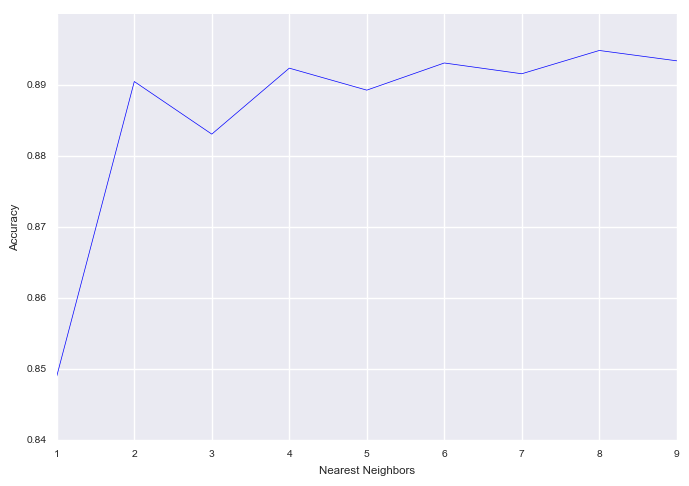

In [107]:
plt.plot(k_range, k_accuracy, color = "blue")
plt.xlabel('Nearest Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [112]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 8)
%time knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)

c_m = confusion_matrix(y_test, y_hat)

print('KNN:\n confusion matrix\n', c_m,'\n\n')
print('\n Classification report \n',classification_report(y_test, y_hat))

CPU times: user 1.21 s, sys: 4.11 ms, total: 1.21 s
Wall time: 1.22 s
KNN:
 confusion matrix
 [[7155  139]
 [ 732  212]] 



 Classification report 
              precision    recall  f1-score   support

          0       0.91      0.98      0.94      7294
          1       0.60      0.22      0.33       944

avg / total       0.87      0.89      0.87      8238



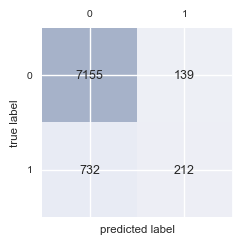

In [113]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(c_m, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(c_m.shape[0]):
    for j in range(c_m.shape[1]):
        ax.text(x = j, y = i, s = c_m[i, j], va = 'center', ha = 'center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

In [114]:
total_gain = np.sum(cost_matrix * c_m)
print(cost_matrix * c_m)
print(total_gain)

[[     0  -1390]
 [-73200  21200]]
-53390


### 3.3 Naive Bayes

In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

print ('Accuracy of Gaussian Naive Bayes is:', accuracy_score(y_test,y_hat))

c_m = confusion_matrix(y_test, y_hat)

print('Naive Bayes:\n confusion matrix\n', c_m,'\n\n')
print('\n Classification report \n',classification_report(y_test, y_hat))

Accuracy of Gaussian Naive Bayes is: 0.866593833455
Naive Bayes:
 confusion matrix
 [[6725  569]
 [ 530  414]] 



 Classification report 
              precision    recall  f1-score   support

          0       0.93      0.92      0.92      7294
          1       0.42      0.44      0.43       944

avg / total       0.87      0.87      0.87      8238



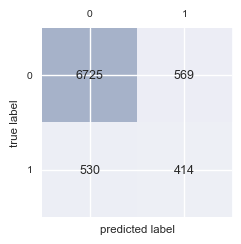

In [118]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(c_m, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(c_m.shape[0]):
    for j in range(c_m.shape[1]):
        ax.text(x = j, y = i, s = c_m[i, j], va = 'center', ha = 'center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

** Cannot use class_weight with KNN nor Naive Bayes **

In [116]:
wclf = GaussianNB(class_weight = class_weight)
%time wclf.fit(X_train, y_train)
y_hat = wclf.predict(X_test)

print ('Accuracy of Gaussian Naive Bayes is:', accuracy_score(y_test,y_hat))

c_m = confusion_matrix(y_test, y_hat)

print(type(c_m))
print('Naive Bayes with weights:\n confusion matrix\n', c_m,'\n\n')
print('\n Classification report \n',classification_report(y_test, y_hat))

TypeError: __init__() got an unexpected keyword argument 'class_weight'

In [119]:
total_gain = np.sum(cost_matrix * c_m)
print(cost_matrix * c_m)
print(total_gain)

[[     0  -5690]
 [-53000  41400]]
-17290


[Back to Top](#Second-Project:-Classification)

## 4. Regression

In [224]:
df_regression = df_reduced
df_regression.rename(columns = {'y':'outcome'}, inplace = True)
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 56 columns):
age                              41188 non-null int64
contact                          41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
cons.conf.idx                    41188 non-null float64
nr.employed                      41188 non-null float64
outcome                          41188 non-null int64
job_admin.                       41188 non-null float64
job_blue-collar                  41188 non-null float64
job_entrepreneur                 41188 non-null float64
job_housemaid                    41188 non-null float64
job_management                   41188 non-null float64
job_retired                      41188 non-null float64
job_self-employed                41188 non-null float64
job_servi

In [225]:
y = df_regression['duration'].values
X = df_regression.ix[:, df_regression.columns != 'duration'].values

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [227]:
X_train.shape

(32950, 55)

### 4.1 Linear Regression

Variance score: -14232768219331671621632.000
MSE: 54402.99


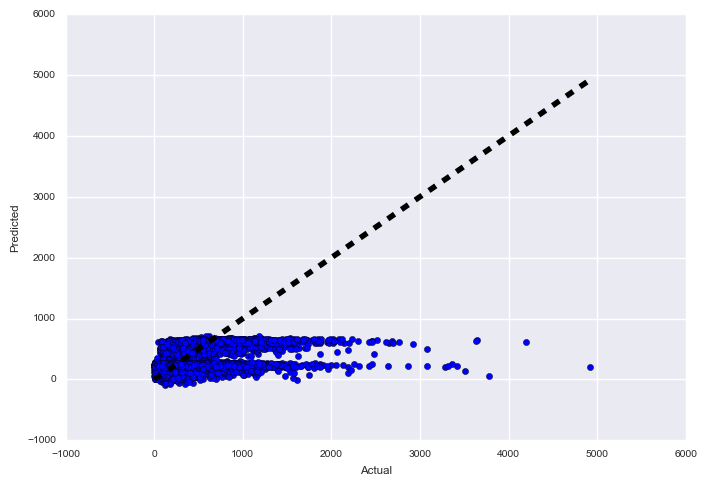

In [228]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

lr = linear_model.LinearRegression()

y_hat = cross_val_predict(lr, X_train, y_train, cv = 10)

print("Variance score: %.3f" % lm.score(X_train, y_train))
print("MSE: %.2f" % np.mean((y_hat - y_train) **2))

fig, ax = plt.subplots()
ax.scatter(y_train, y_hat)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

lm = linear_model.LinearRegression(normalize = True)
%time lm.fit(X_train_scaled, y_train)
y_hat = lm.predict(X_test_scaled)
estimated_coeff = lm.coef_

print("Variance score: %.3f" % lm.score(X_test_scaled, y_test))
print("MSE: %.2f" % np.mean((y_hat - y_test) **2))

CPU times: user 80.4 ms, sys: 7.67 ms, total: 88.1 ms
Wall time: 49.3 ms
Variance score: 0.193
MSE: 53657.32


In [230]:
pd.DataFrame(zip(df_regression.ix[:, df_regression.columns != 'duration'].columns, estimated_coeff), columns = ['features', 'EstimatedCoefficients'])

,features,EstimatedCoefficients
0,age,-1.487150e+00
1,contact,5.977265e+00
2,campaign,-1.365536e+01
3,pdays,-2.522870e+00
4,previous,1.451907e+00
5,cons.conf.idx,-2.649874e+00
6,nr.employed,3.808027e+01
7,outcome,1.243146e+02
8,job_admin.,-2.912453e+13
9,job_blue-collar,-2.789874e+13


In [234]:
estimated_coeff

array([ -1.48714996e+00,   5.97726517e+00,  -1.36553599e+01,
        -2.52287001e+00,   1.45190667e+00,  -2.64987425e+00,
         3.80802671e+01,   1.24314565e+02,  -2.91245258e+13,
        -2.78987416e+13,  -1.23066740e+13,  -1.04725949e+13,
        -1.71659200e+13,  -1.32099829e+13,  -1.20789542e+13,
        -1.97346972e+13,  -9.47386596e+12,  -2.47612510e+13,
        -1.04047479e+13,  -6.06900109e+12,  -8.51506270e+12,
        -1.31357206e+13,  -1.20612510e+13,  -1.15527023e+12,
        -5.31619305e+12,  -4.07539412e+12,  -6.20050349e+12,
        -7.42989267e+12,  -3.75735967e+11,  -5.88735354e+12,
        -8.03109992e+12,  -3.53578573e+12,   1.90355875e+12,
         2.76225930e+12,   5.24922274e+11,   2.95807987e+12,
         2.59874359e+12,   8.96085556e+11,   3.66629563e+12,
         2.32907575e+12,   1.01158465e+12,   9.21580264e+11,
         6.41898812e+12,   6.61029338e+12,   6.65911055e+12,
         6.48903647e+12,   6.49434156e+12,   8.05001732e-01,
        -1.04877471e+00,

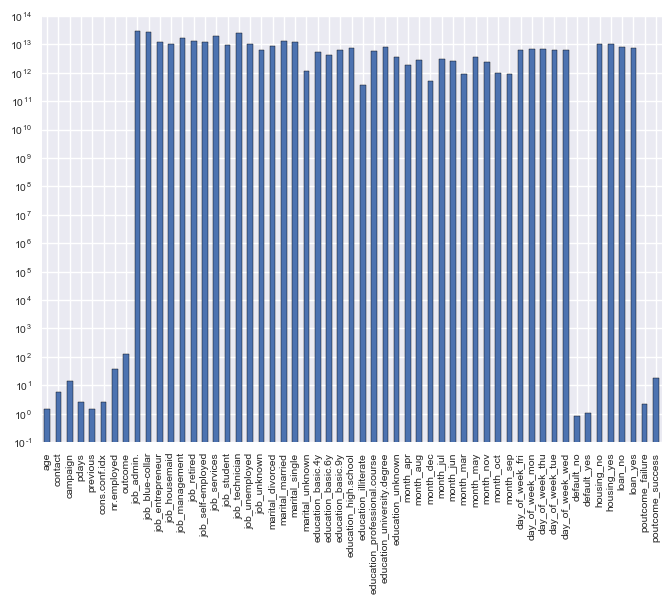

In [238]:
weights = pd.Series(np.abs(estimated_coeff), index = df_regression.ix[:, df_regression.columns != 'duration'].columns)
weights.plot(kind = 'bar', logy = True)
plt.show()

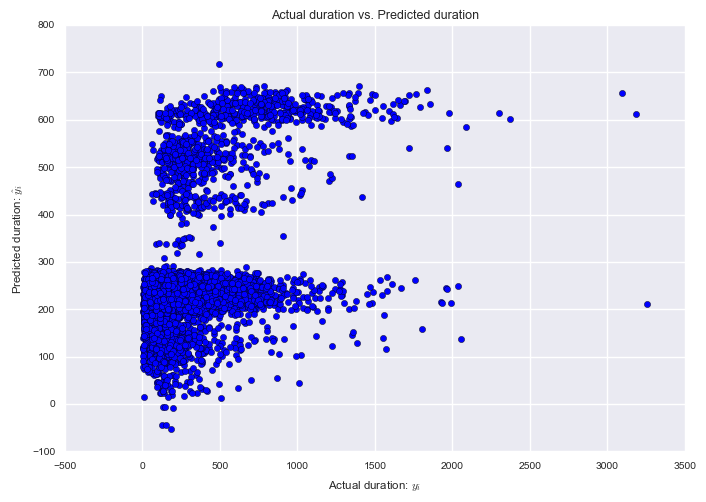

In [215]:
plt.scatter(y_test, y_hat)
plt.xlabel("Actual duration: $y_i$")
plt.ylabel("Predicted duration: $\hat{y}_i$")
plt.title("Actual duration vs. Predicted duration")

In [240]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipe_lrm = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components = 40)),
                    ('lrm', LinearRegression())])

%time pipe_lrm.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lrm.score(X_test, y_test))
y_pred = pipe_lrm.predict(X_test)

CPU times: user 977 ms, sys: 58.2 ms, total: 1.04 s
Wall time: 301 ms
Test Accuracy: 0.178


In [241]:
from sklearn.model_selection import StratifiedKFold
    
%time kfold = StratifiedKFold(n_splits = 10, random_state = 1).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lrm.fit(X_train[train], y_train[train])
    score = pipe_lrm.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k + 1, np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CPU times: user 81 µs, sys: 3 µs, total: 84 µs
Wall time: 86.1 µs


/Users/GS7271/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Fold: 1, Class dist.: [3 2 0 ..., 0 0 1], Acc: 0.074
Fold: 2, Class dist.: [3 2 1 ..., 0 0 1], Acc: 0.208
Fold: 3, Class dist.: [3 2 1 ..., 0 0 1], Acc: 0.206
Fold: 4, Class dist.: [3 3 1 ..., 0 0 1], Acc: 0.133
Fold: 5, Class dist.: [4 3 1 ..., 0 0 1], Acc: 0.114
Fold: 6, Class dist.: [4 3 1 ..., 0 0 1], Acc: 0.031
Fold: 7, Class dist.: [4 3 1 ..., 0 0 1], Acc: -0.081
Fold: 8, Class dist.: [4 3 1 ..., 0 0 1], Acc: -0.102
Fold: 9, Class dist.: [4 3 1 ..., 0 0 1], Acc: -0.214
Fold: 10, Class dist.: [4 3 1 ..., 0 0 1], Acc: -0.222

CV accuracy: 0.015 +/- 0.153


### 4.2 Kernel Regression

In [217]:
from sklearn.kernel_ridge import KernelRidge

kr = KernelRidge(alpha = 1.0)
%time kr.fit(X_train_scaled, y_train)
y_hat = kr.predict(X_test_scaled)
#estimated_coeff = kr.coef_

print("Variance score: %.3f" % kr.score(X_test_scaled, y_test))
print("MSE: %.2f" % np.mean((y_hat - y_test) **2))

CPU times: user 4min 52s, sys: 6.1 s, total: 4min 58s
Wall time: 1min 47s
Variance score: -0.825
MSE: 121326.64


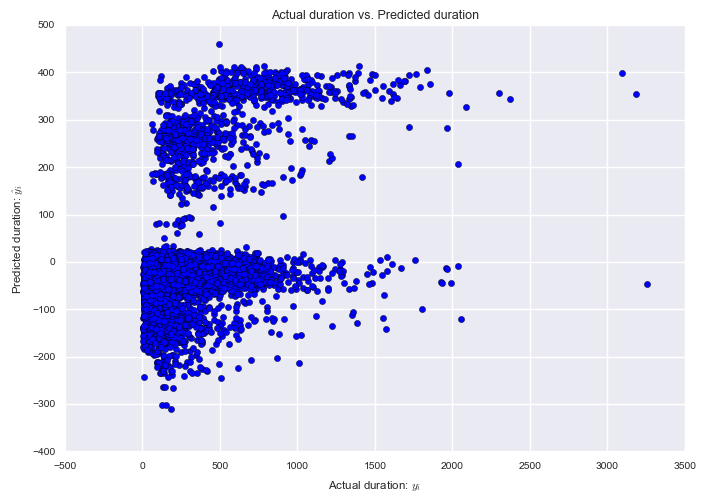

In [218]:
plt.scatter(y_test, y_hat)
plt.xlabel("Actual duration: $y_i$")
plt.ylabel("Predicted duration: $\hat{y}_i$")
plt.title("Actual duration vs. Predicted duration")

### 4.3 Regression Tree 

In [222]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth = 2)
%time dtr.fit(X_train_scaled, y_train)
y_hat = dtr.predict(X_test_scaled)
#estimated_coeff = dtr.coef_

print("Variance score: %.3f" % dtr.score(X_test_scaled, y_test))
print("MSE: %.2f" % np.mean((y_hat - y_test) **2))

CPU times: user 49.5 ms, sys: 1.19 ms, total: 50.7 ms
Wall time: 50.1 ms
Variance score: 0.228
MSE: 51338.12


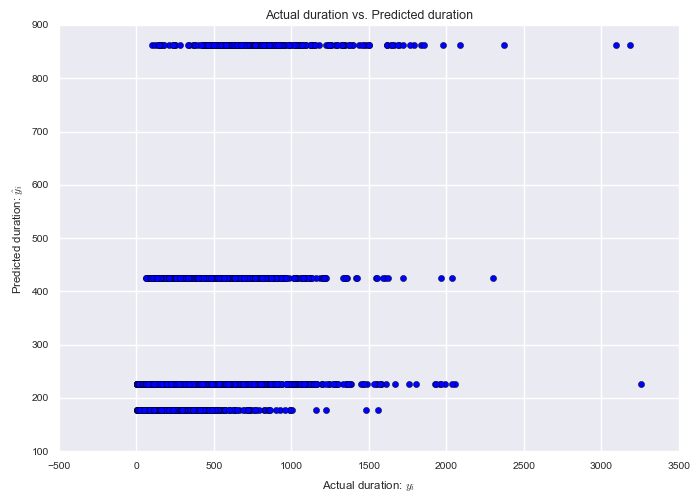

In [223]:
plt.scatter(y_test, y_hat)
plt.xlabel("Actual duration: $y_i$")
plt.ylabel("Predicted duration: $\hat{y}_i$")
plt.title("Actual duration vs. Predicted duration")

[Back to Top](#Second-Project:-Classification)

## 5. Deployment